# Random Number Generation

<img src="figs/coin.jpg" width="40%" align="left" alt="coin">

Random number generation is essential to simulation. Before we discuss how to simulate different queuing models, we need to first describe how to generate random numbers in simulation, particularly in simulus.

In this tutorial, we will use the `scipy.stats` module to generate random numbers to simulate the queuing models. Python's  native `random` module can also be used for this purpose. (In fact, `simulus` uses the `random` module as its core random number generator.) But the `scipy.stats` module contains a huge number of probability distributions (more than 120 of them!), as well as many useful statistical functions, which are extremely useful for simulation tasks, and of course it would be more than sufficient for our tutorial.

The `scipy.stats` module uses the pseudo-random number generator provided by `numpy`. Both `numpy` and Python's `random` module use the Mersenne Twister as the core generator. This generator produces 53-bit precision floats and has a period of $2^{19937}-1$. It has been proven that this generator has very good random properties.

Before we start this section of the tutorial, run the following cell so that we set up the environment by importing the necessary packages.

In [1]:
# for random distributions, random number generators, statistics
import random
import numpy as np
import scipy.stats as stats

# for simulation and for qmodels
import simulus, qmodels

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# for animation inside the notebook
import ipywidgets as widgets
from ipywidgets import interact

## Random Variables in scipy.stats

The `scipy.stats` module contains a large number of probability distributions. Let's first examine a few. One of the most common distribution used in simulation is the exponential distribution. The function `expon(scale)` creates an exponential random variable and the parameter 'scale' is the mean of the distribution. 

In [2]:
x = stats.expon(scale=2)

We can easily find the mean, the median, and the standard deviation of the random variable, using the following functions:

In [3]:
x.mean(), x.median(), x.std()

(2.0, 1.3862943611198906, 2.0)

We can also use the `stats(moments)` method to find the mean(‘m’), variance (‘v’), skew (‘s’), and kurtosis(‘k’), where the argument 'moments' specifies which we would like to have. In the following, we print them all:

In [4]:
m, v, s, k = x.stats(moments='mvsk')
print('mean=%g, var=%g, skew=%g, kurtosis=%g' % (m, v, s, k))

mean=2, var=4, skew=2, kurtosis=6


We can plot the probability density function (pdf) and the cumulative density function (cdf) of the random variable. In the following, we first define a couple of functions to get ready for plotting:

In [5]:
def plot_rv(rv, title, xmin=None, xmax=None):
    # find the range (ppf() is the inverse cdf)
    if xmin is None: xmin = rv.ppf(0.01)
    if xmax is None: xmax = rv.ppf(0.99)
    xs = np.linspace(xmin, xmax, 100)

    # get the data points for pdf and cdf
    ys = rv.pdf(xs)
    zs = rv.cdf(xs)
    
    plt.fill_between(xs, ys, color='#7fc97f', alpha=0.7)
    plt.plot(xs, ys, color='#7fc97f', lw=3, alpha=0.9, label='pdf')

    plt.fill_between(xs, zs, color='#beaed4', alpha=0.7)
    plt.plot(xs, zs, color='#beaed4', lw=3, alpha=0.9, label='cdf')
    
    plt.title(title)
    plt.xlim(xmin, xmax)
    plt.ylim(0)
    plt.legend()
    plt.show()

The above function takes a random variable, a string title of the plot, and the optional min and max data range for plotting. If min and max are ignored, we choose the 1% and 99% of the distribution as the range for plotting. The following function creates an exponentially distributed random variable with the given scale (mean) and uses the above function to plot it. 

In [6]:
def plot_expon(mean):
    rv = stats.expon(scale=mean)
    plot_rv(rv, "exponential (mean=%g)" % mean)

Now we are ready to plot the exponential distribution:

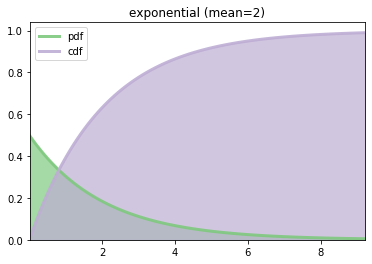

In [7]:
plot_expon(2.0)

Using ipywidgets, we can dynamically change the 'scale' parameter (using a slider) and plot the distribution on the fly. In the following, we can move the slider to change the scale value and therefore alter the pdf and cdf curves.

In [8]:
slider = widgets.FloatSlider(min=0.1, max=5, value=2)
interact(plot_expon, mean=slider)
None

interactive(children=(FloatSlider(value=2.0, description='mean', max=5.0, min=0.1), Output()), _dom_classes=('…

Let's do the same for two other distributions, gamma and normal, just for fun:

In [9]:
def plot_gamma(a, scale):
    rv = stats.gamma(a=a, scale=scale)
    plot_rv(rv, "gamma (a=%g, scale=%g)" % (a,scale))

slider_a = widgets.FloatSlider(min=0.1, max=5, value=2.5)
slider_scale = widgets.FloatSlider(min=0.1, max=5, value=0.4)
interact(plot_gamma, a=slider_a, scale=slider_scale)
None

interactive(children=(FloatSlider(value=2.5, description='a', max=5.0, min=0.1), FloatSlider(value=0.4, descri…

In [10]:
def plot_norm(mean, stdev):
    rv = stats.norm(loc=mean, scale=stdev)
    plot_rv(rv, "normal (mean=%g, stdev=%g)" % (mean, stdev))
    
slider_mean = widgets.FloatSlider(min=-2, max=2, value=0)
slider_stdev = widgets.FloatSlider(min=0.1, max=2, value=1)
interact(plot_norm, mean=slider_mean, stdev=slider_stdev)
None

interactive(children=(FloatSlider(value=0.0, description='mean', max=2.0, min=-2.0), FloatSlider(value=1.0, de…

## Generating Random Variates

The values obtained from the random variables (such as the mean, the standard deviation, pdf and cdf) are all deterministic as the probability distribution. Once a random variable is created, one can use the `rvs(size)` method to draw random samples from the distribution, where the 'size' argument (as a positional argument) specifies the number of samples. 

Random samples depend on the random number generator. To get repeatable results, we can first set a random seed. Recall that the `scipy.stats` module uses the pseudo-random number generator provided in the `numpy` module. Therefore, we should set the random seed using the `numpy.random.seed()` function (as opposed to `random.seed()`, which is used for the Python's `random` module).

In [11]:
# x is a random variable (with a probability distribution)
x = stats.expon(scale=2.0)

# set the random seed, and get the first 1000 random 
# samples; we show the first 3 random numbers
np.random.seed(13579)
xs1 = x.rvs(1000)
print('the first 1000 samples: %r...' % xs1[:3])

# set another random seed, and get another 1000 random
# samples; again we show the first 3 random numbers
np.random.seed(24680)
xs2 = x.rvs(1000)
print('the second 1000 samples: %r...' % xs2[:3])

the first 1000 samples: array([0.36717359, 0.71748813, 0.24954749])...
the second 1000 samples: array([0.82463564, 0.88634089, 1.43507555])...


The random seed determines the random sequence of the random number generator. If we reuse the same random seed, we should be able to get the same random sequence.

In [12]:
np.random.seed(13579) # reuse the seed from previous
xs1 = x.rvs(1000)
print('repeat the first 1000 samples: %r...' % xs1[:3])

np.random.seed(24680) # reuse the seed from previous
xs2 = x.rvs(1000)
print('repeat the second 1000 samples: %r...' % xs2[:3])

repeat the first 1000 samples: array([0.36717359, 0.71748813, 0.24954749])...
repeat the second 1000 samples: array([0.82463564, 0.88634089, 1.43507555])...


We can investigate whether the random numbers are indeed drawn from the expected random distribution. To do that, we can plot a histogram of the random numbers and compare that with the true distribution.

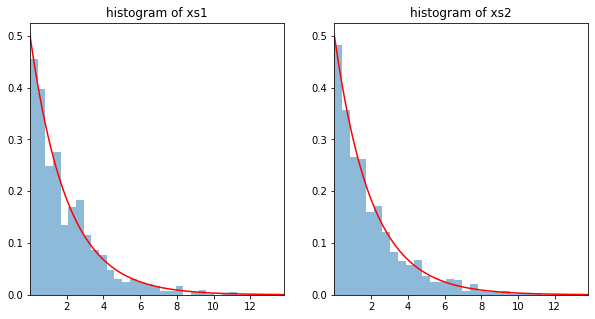

In [13]:
plt.figure(figsize=(10,5))

xmin, xmax = x.ppf(0.001), x.ppf(0.999)
xs = np.linspace(xmin, xmax, 100)
ys = x.pdf(xs)

axs = plt.subplot(1, 2, 1)
axs.hist(xs1, alpha=0.5, bins='auto', density=True)
axs.plot(xs, ys, 'r-')
axs.set_xlim(xmin, xmax)
axs.set_title("histogram of xs1")

axs = plt.subplot(1, 2, 2)
axs.hist(xs2, alpha=0.5, bins='auto', density=True)
axs.plot(xs, ys, 'r-')
axs.set_xlim(xmin, xmax)
axs.set_title("histogram of xs2")

plt.show()

## Repeatable Random Sequences in Simulation

### Global Random Seed

Simulus uses the Python's `random` module as the default random number generator. In order to obtain repeatable results, one needs to set the random seed using `random.seed()` before calling any simulus functions (such as creating a simulator). 

The following example a simple instance of simulus that uses the default random number generator in the `random` module. The example generates a series of random integers between 0 and 99.

In [14]:
random.seed(13579) # the global random seed

sim = simulus.simulator()
x = [random.randint(0,99) for _ in range(10)]
print(x)

[34, 3, 21, 85, 92, 15, 63, 35, 70, 40]


The random seed in the above example (13579) is called *the global random seed*. One can set the global random seed before the first simulator in simulus is created. (Simulus uses the random number generator defined in the `random` module to create a namespace when the first simulator is created. The namespace will partially determine the random sequence of the random number generators attached to the simulators. We will discuss this momentarily.)

The above example can run repeatedly and the same random sequence (34, 3, 21, ...) will be generated each time. This is obvious because we use the same seed each time we run the example. However, if we are using the `scipy.stats` module, we also need to set the random seed for the `numpy.random` module. We can do this by getting a random (32-bit) integer from the `random` module, and use it as the seed for the `numpy.random` module. In doing so, the simulation can run repeatedly with the same results as long as we use the same global random seed.

In [15]:
random.seed(13597) # the global random seed

s = random.randrange(2**32)
print("numpy.random's seed=%d" % s)
np.random.seed(s)

sim = simulus.simulator()
x = stats.randint(0, 99).rvs(10)
print(x)

numpy.random's seed=4121229328
[84 97 77 42 51 90 51 82 78 56]


### Simulator-Specific Random Sequence

In simulus, the global random seed determines all the random sequences of the simulation. This would satisfy most of the simulation needs in terms of repeatability. However, there are cases this may not be sufficient. 

For example, we may want to have a unique random sequence specific to a simulator. This can be important if we run our model in parallel with multiple simulators, say, one on each CPU core. So if a machine has 24 cores, we may have 24 simulators running simultaneously on the machine. And if run simulus for distributed simulation on 100 such machines in a cluster, we may have a simulation with 2400 simulators, each dealing with a smaller part of a large model. In this scenario, each simulator should have its own random sequence in order to get repeatable results.

A random sequence from a simulator is uniquely determined by the global random seed and the name of the simulator. Simulus guarantees that as long as we choose the same global random seed and use the same name for a simulator, we can obtain the same random sequence, regardless of where we run the simulator (even if on a different CPU core and on a different machine in the cluster).

The following example shows how to use the simulator-specific random number generator (using `sim.rng().randint` as opposed of using `random.randint`). This example again generates a series of random integers between 0 and 99. The sequence would be dependent on the simulator's name 'myname'. If the simulator's name is fixed, the random sequence then would only change if we change the global random seed next time we run the example.

In [16]:
random.seed(13579) # the global random seed

sim = simulus.simulator('myname')
x = [sim.rng().randint(0,99) for _ in range(10)] # simulator-specific random sequence
print(x)

[42, 20, 56, 40, 73, 31, 95, 94, 67, 22]


### Separate Random Streams

Even within a simulator, we may need to use separate random sequences, a.k.a. *random streams* --- for example, one for the customer inter-arrival time and the other for the service time. Having multiple random streams would make it easier to debug the models, since one can keep the same random sequence for each part of the model, even if we have to change the other parts. 

In the following example, we create two `numpy` random number generators ('rng1' and 'rng2') using two 32-bit random integers ('s1' and 's2') from the simulator-specific random sequence. We attach the random number generators to the random variables, 'rv1' and 'rv2', by setting the `random_state` of the corresponding random variables.

In [17]:
random.seed(13579) # the global random seed

sim = simulus.simulator('myname')

s1 = sim.rng().randrange(2**32)
rng1= np.random.RandomState(s1)
print("create rng1 with seed=%d" % s1)

s2 = sim.rng().randrange(2**32)
rng2= np.random.RandomState(s2)
print("create rng2 with seed=%d" % s2)

rv1 = stats.randint(0, 99)
rv1.random_state = rng1

rv2 = stats.randint(0, 99)
rv2.random_state = rng2

print('stream1: %r' % rv1.rvs(10))
print('stream2: %r' % rv2.rvs(10))

create rng1 with seed=691080952
create rng2 with seed=4265267818
stream1: array([32, 67, 27, 38, 69, 12, 92, 97, 38, 69])
stream2: array([59, 19, 96, 87, 97, 89, 40,  6, 95, 37])


Now if we change one random stream, say, by replacing the random variable 'rv1' with a geometric distribution and also by changing the number of random samples drawn from the distribution (from 10 to 20), the other random stream would remain the same.

In [18]:
random.seed(13579) # the global random seed

sim = simulus.simulator('myname')

s1 = sim.rng().randrange(2**32)
rng1= np.random.RandomState(s1)
print("create rng1 with seed=%d" % s1)

s2 = sim.rng().randrange(2**32)
rng2= np.random.RandomState(s2)
print("create rng2 with seed=%d" % s2)

rv1 = stats.geom(0.25)
rv1.random_state = rng1

rv2 = stats.randint(0, 99)
rv2.random_state = rng2

print('stream1: %r' % rv1.rvs(20))
print('stream2 (should be same): %r' % rv2.rvs(10))

create rng1 with seed=691080952
create rng2 with seed=4265267818
stream1: array([1, 2, 6, 1, 6, 1, 3, 4, 1, 8, 1, 4, 3, 2, 7, 3, 2, 1, 2, 2])
stream2 (should be same): array([59, 19, 96, 87, 97, 89, 40,  6, 95, 37])


## Using Python Generator Functions

The practice of simulation can be different from pure statistical analysis in that simulation tends to use the random numbers one at a time. For example, we draw one random number to represent the time it takes for the next customer to arrive at queue, and then we draw another to represent the time it takes for the customer to be served, although the two random numbers are drawn from different probability distributions. 

This can be accomplished easily using generator functions. Generator functions in Python are functions that can be paused and resumed on the fly, each time returning an object. The object can be inside an iteration. For random number generation, the returned objects are random numbers from a probability distribution. 

To create a generator, one simply define a function that uses the 'yield' statement instead of 'return'. In the following example, we define a generator function `exp_generator()` which returns one random number at a time drawn from an exponential distribution with the given mean. We create two generator instances each with a separate random stream: one for the inter-arrival time and the other for the service time. The two random streams are "attached" with the simulator named 'myname'. As a result, they are independent, unique, and repeatable, as long as we use the same global random seed. 

In [19]:
def expon(mean, seed):
    rv = stats.expon(scale=mean)
    rv.random_state = np.random.RandomState(seed)
    while True:
        for x in rv.rvs(100):
            yield x

random.seed(13579) # the global random seed
sim = simulus.simulator('myname')
inter_arrival_time = expon(1.2, sim.rng().randrange(2**32))
service_time = expon(0.8, sim.rng().randrange(2**32))

for i in range(5):
    print("%d: iatime=%g, svctime=%g" % 
          (i, next(inter_arrival_time), next(service_time)))
print('...')

0: iatime=0.0836329, svctime=0.659787
1: iatime=0.612976, svctime=0.0816539
2: iatime=1.75473, svctime=1.05767
3: iatime=0.0635947, svctime=3.02943
4: iatime=1.89737, svctime=1.33523
...


## Source Code

The following is the source code for random number generator functions:

In [20]:
# %load '../qmodels/rng.py'
"""Random number generators as Python generator functions."""

import numpy as np
import scipy.stats as stats

__all__ = ['expon', 'gamma', 'norm', 'truncnorm']

batch_size = 100

def expon(mean, seed):
    '''Returns a generator function for an i.i.d random variate from an
    exponential distribution with the given mean.'''
    rv = stats.expon(scale=mean)
    rv.random_state = np.random.RandomState(seed)
    while True:
        for x in rv.rvs(batch_size):
            yield x

def gamma(a, scale, seed):
    '''Returns a generator function for an i.i.d. random variate from a
    gamma distribution, where a is the shape parameter (when a is an
    integer, gamma reduces to the Erlang distribution; and when a = 1
    to the exponential distribution).'''
    rv = stats.gamma(a, scale)
    rv.random_state = np.random.RandomState(seed)
    while True:
        for x in rv.rvs(batch_size):
            yield x

def norm(mean, stdev, seed):
    '''Returns a generator function for an i.i.d. random variate from a
    normal distribution with teh given mean and standard deviation.'''
    rv = stats.norm(loc=mean, scale=stdev)
    rv.random_state = np.random.RandomState(seed)
    while True:
        for x in rv.rvs(batch_size):
            yield x
            
def truncnorm(a, b, seed):
    '''Returns a generator function for an i.i.d. random variate from a
    normal distribution truncated to the range between a and b.'''
    rv = stats.truncnorm(a, b)
    rv.random_state = np.random.RandomState(seed)
    while True:
        for x in rv.rvs(batch_size):
            yield x
